<a href="https://colab.research.google.com/github/guiebitt/cddeeplearning/blob/master/exercicio03_melhor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema

- Prever o aluguel de bicicletas de acordo com condições como tempo, temperatura, velocidade do vento e etc...

# Etapa 01: Importação das bibliotecas

In [66]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.5.0'

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Etapa 02: Importação dos dados

In [68]:
bike_df = pd.read_csv('/bike-sharing-daily.csv')
bike_df.reset_index(drop = True, inplace = True)
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


In [69]:
# Visualizar primeiros dados
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [70]:
# Visualizar últimos dados
bike_df.tail(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
721,722,12/22/2012,1,1,12,0,6,0,1,0.265833,0.441250,0.407346,205,1544,1749
722,723,12/23/2012,1,1,12,0,0,0,1,0.245833,0.515417,0.133083,408,1379,1787
723,724,12/24/2012,1,1,12,0,1,1,2,0.231304,0.791304,0.077230,174,746,920
724,725,12/25/2012,1,1,12,1,2,0,2,0.291304,0.734783,0.168726,440,573,1013
725,726,12/26/2012,1,1,12,0,3,1,3,0.243333,0.823333,0.316546,9,432,441
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.577500,0.154846,439,2290,2729


In [71]:
# Resumo dos dados
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [72]:
# Informação sobre os dados
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB



# Etapa 03: Limpeza da base de dados

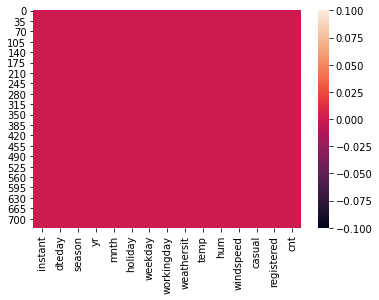

In [73]:
# Analisar se há dados nulos
sns.heatmap(bike_df.isnull());

In [74]:
# Remover coluna "instant", por não fazer sentido para o modelo
bike_df = bike_df.drop(labels=["instant"], axis=1)

In [75]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [76]:
# Remover colunas "casual" e "registered", pois já são parte do resultado "cnt"
bike_df = bike_df.drop(labels=["casual", "registered", "hum", "windspeed"], axis=1)

In [77]:
bike_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,1600
...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,0.254167,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,1796


In [78]:
# Tratamento para coluna de data, garantindo que é um data e mantém o mesmo formato
bike_df.dteday = pd.to_datetime(bike_df.dteday, format="%m/%d/%Y")

In [79]:
bike_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,1600
...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,1796


In [80]:
# Transformando a coluna de data no índice
bike_df.index = pd.DatetimeIndex(bike_df.dteday)

In [81]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,cnt
dteday,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,1600


In [82]:
# Remover a coluna de data (pois já está no índice)
bike_df = bike_df.drop(labels=["dteday"], axis=1)

In [83]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,cnt
dteday,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,985
2011-01-02,1,0,1,0,0,0,2,0.363478,801
2011-01-03,1,0,1,0,1,1,1,0.196364,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,1600


# Etapa 04: Visualização da base de dados

Text(0, 0.5, 'Bike rental')

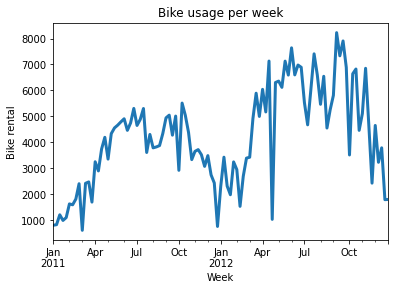

In [84]:
# Como temos a coluna de data no índice, conseguimos apresentar no gráfico a contagem de bicicletas por período (W = Semana)
bike_df.cnt.asfreq('W').plot(linewidth=3)
plt.title('Bike usage per week')
plt.xlabel('Week')
plt.ylabel('Bike rental')

Text(0, 0.5, 'Bike rental')

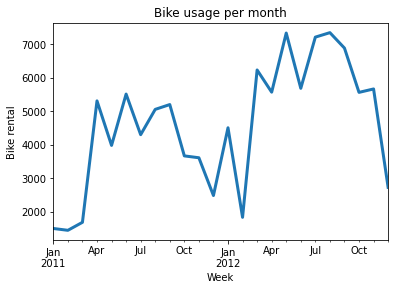

In [85]:
# Apresentar no gráfico a contagem de bicicletas por período (M = Month)
bike_df.cnt.asfreq('M').plot(linewidth=3)
plt.title('Bike usage per month')
plt.xlabel('Week')
plt.ylabel('Bike rental')

Text(0, 0.5, 'Bike rental')

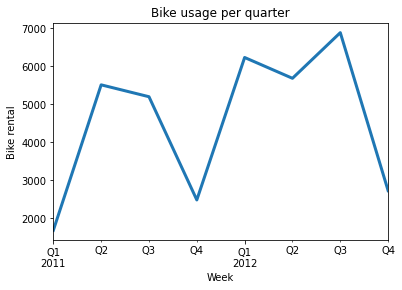

In [86]:
# Apresentar no gráfico a contagem de bicicletas por período (Q = Quartil)
bike_df.cnt.asfreq('Q').plot(linewidth=3)
plt.title('Bike usage per quarter')
plt.xlabel('Week')
plt.ylabel('Bike rental')

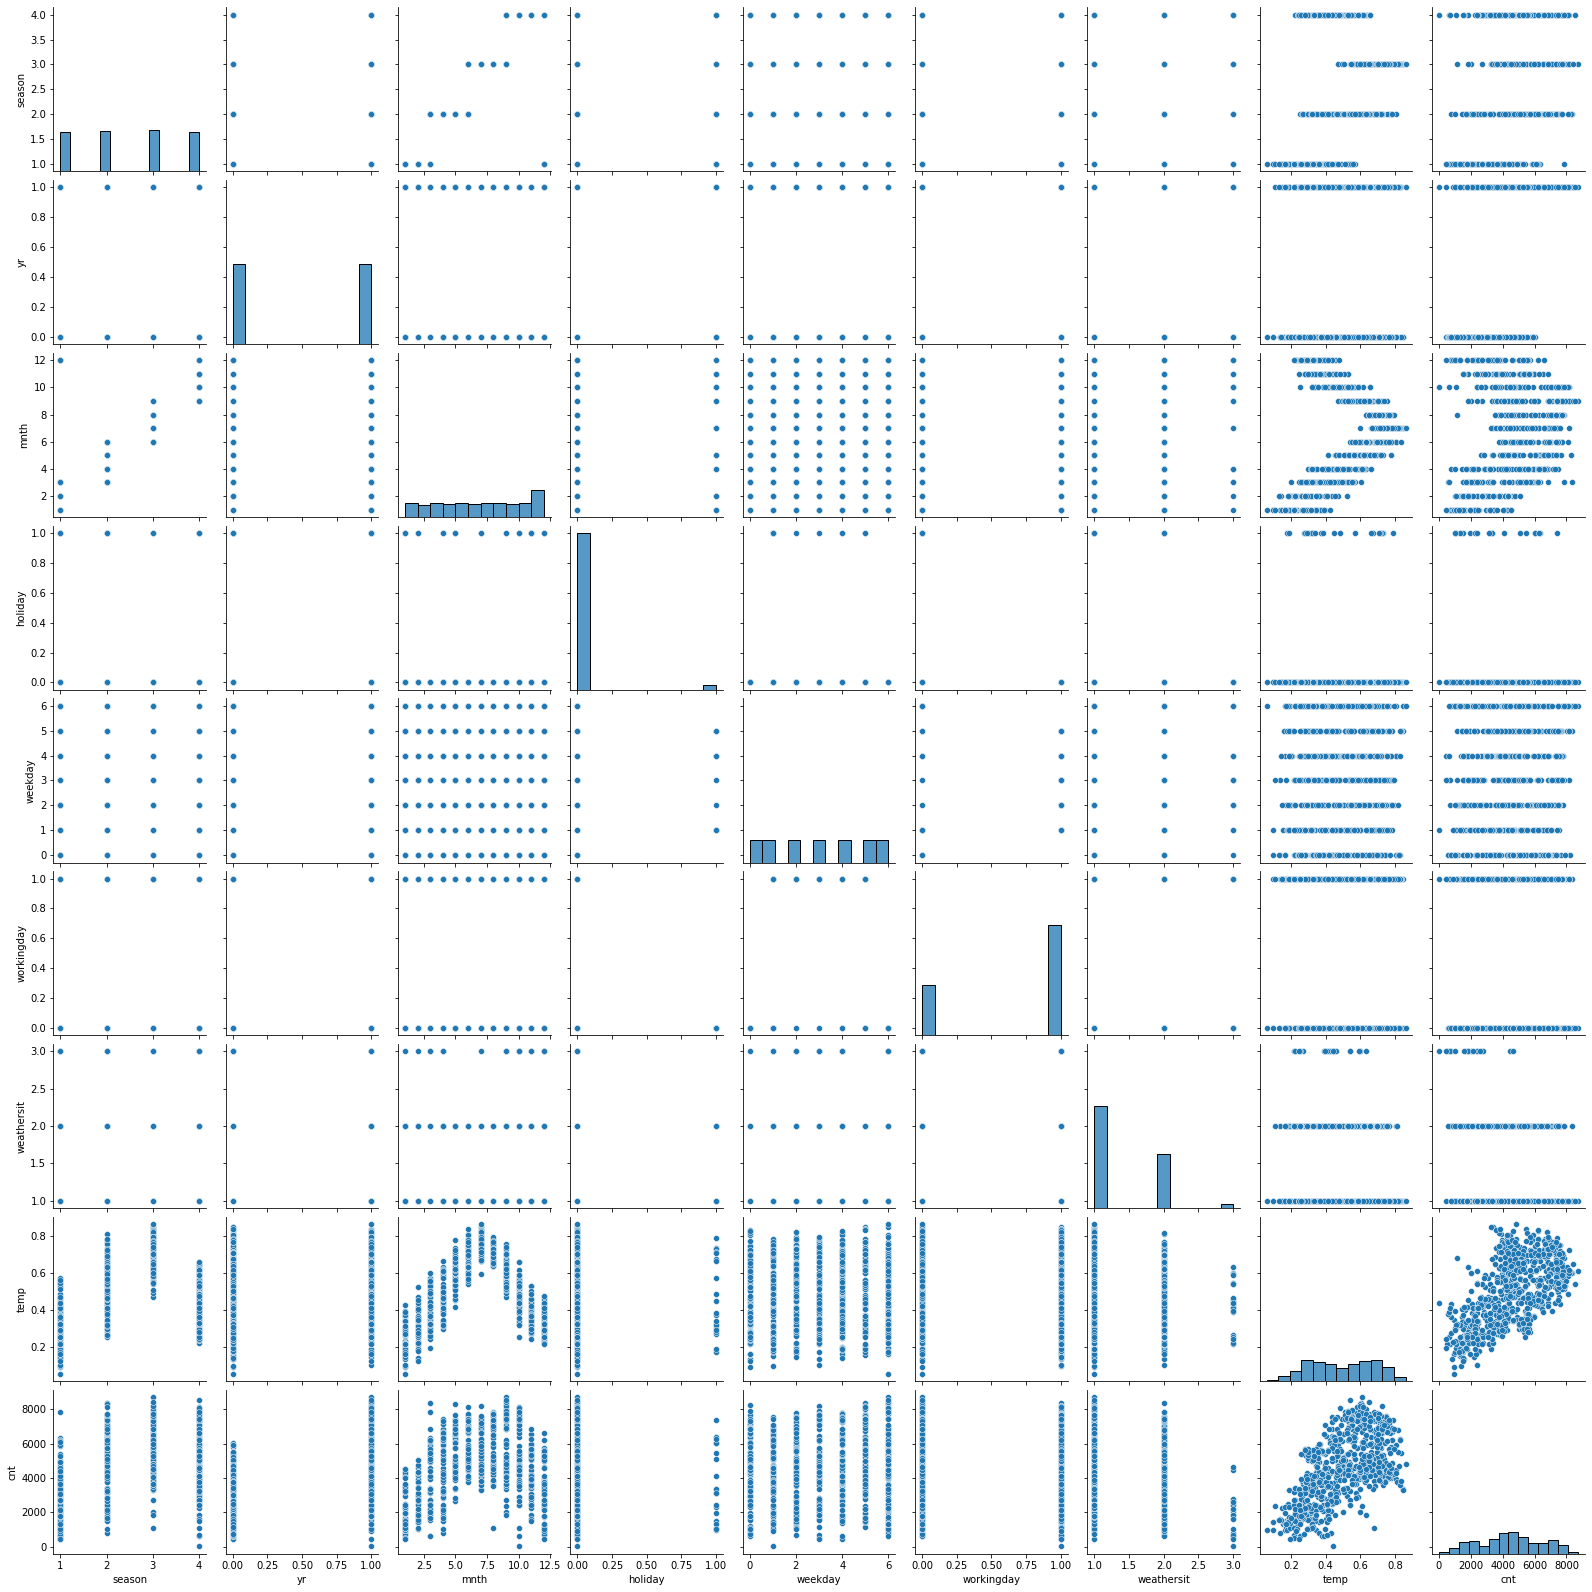

In [87]:
# Apresentando de forma visual a relação entre as variáveis
sns.pairplot(bike_df);

In [130]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,cnt
dteday,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,985
2011-01-02,1,0,1,0,0,0,2,0.363478,801
2011-01-03,1,0,1,0,1,1,1,0.196364,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,1600


In [131]:
# Separando as variáveis numéricas das variáveis categóricas, para que possamos avaliar a correlação
x_numerical = bike_df[['temp', 'cnt']]
x_numerical

,temp,cnt
dteday,,
2011-01-01,0.344167,985
2011-01-02,0.363478,801
2011-01-03,0.196364,1349
2011-01-04,0.200000,1562
2011-01-05,0.226957,1600
...,...,...
2012-12-27,0.254167,2114
2012-12-28,0.253333,3095
2012-12-29,0.253333,1341


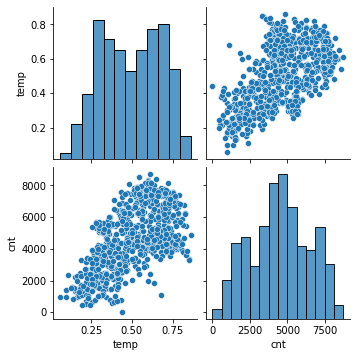

In [132]:
# Avaliando a correlação entre as variáveis de forma visual
sns.pairplot(x_numerical);

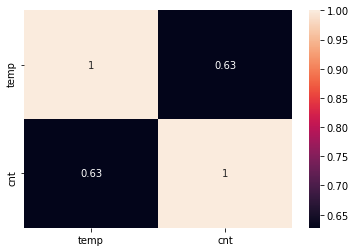

In [133]:
# Avaliar a correlação a partir da matriz de correlação
sns.heatmap(x_numerical.corr(), annot=True)

# Etapa 05: Tratamento da base de dados

In [134]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,cnt
dteday,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,985
2011-01-02,1,0,1,0,0,0,2,0.363478,801
2011-01-03,1,0,1,0,1,1,1,0.196364,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,1600


In [135]:
# Separando as variáveis categóricas, pois vão precisar ser tratadas para que o modelo entenda as mesmas com a devida prioridade
x_cat = bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
x_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1


In [136]:
# Algumas variáveis categóricas, possuem mais que duas opções.
# Se deixarmos assim, o modelo irá achar que valores superiores a 1 possuem peso maior que as demais.
# Porém, ambas possuem o mesmo "peso" e precisamos normalizar essas variáveis. Com a aplicação da função
# OneHotEncoder, esses valores são convertidos em uma matriz com tamanho igual a quantidade de opções e
# o valor 1 é indicado para a posição que representa a opção e 0 para as demais posições.
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(x_cat).toarray()

In [137]:
x_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [138]:
x_cat.shape

(731, 32)

In [139]:
x_cat = pd.DataFrame(x_cat)
x_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [140]:
x_numerical

,temp,cnt
dteday,,
2011-01-01,0.344167,985
2011-01-02,0.363478,801
2011-01-03,0.196364,1349
2011-01-04,0.200000,1562
2011-01-05,0.226957,1600
...,...,...
2012-12-27,0.254167,2114
2012-12-28,0.253333,3095
2012-12-29,0.253333,1341


In [141]:
# Removendo o índice pela data que será desnecessário para o modelo
x_numerical = x_numerical.reset_index()
x_numerical

,dteday,temp,cnt
0,2011-01-01,0.344167,985
1,2011-01-02,0.363478,801
2,2011-01-03,0.196364,1349
3,2011-01-04,0.200000,1562
4,2011-01-05,0.226957,1600
...,...,...,...
726,2012-12-27,0.254167,2114
727,2012-12-28,0.253333,3095
728,2012-12-29,0.253333,1341
729,2012-12-30,0.255833,1796


In [142]:
# Concatena os valores numéricos e categóricos já tratados
x_all = pd.concat([x_cat, x_numerical], axis=1)
x_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,dteday,temp,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,1600


In [143]:
# Remove a coluna "dteday" que não é relevante para o modelo
x_all = x_all.drop(labels=['dteday'], axis=1)
x_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,temp,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,1600


# Etapa 06: Configurar base de treinamento

In [144]:
# Configurando nossa variável x (variáveis independentes que são nossas entradas)
# e y (variável dependente que é nosso resultado)
x = x_all.iloc[:,:-1].values # Todas as colunas exceto cnt
y = x_all.iloc[:,-1:].values # Apenas a coluna cnt

In [145]:
x.shape

(731, 33)

In [146]:
y.shape

(731, 1)

In [147]:
x

array([[1.      , 0.      , 0.      , ..., 1.      , 0.      , 0.344167],
       [1.      , 0.      , 0.      , ..., 1.      , 0.      , 0.363478],
       [1.      , 0.      , 0.      , ..., 0.      , 0.      , 0.196364],
       ...,
       [1.      , 0.      , 0.      , ..., 1.      , 0.      , 0.253333],
       [1.      , 0.      , 0.      , ..., 0.      , 0.      , 0.255833],
       [1.      , 0.      , 0.      , ..., 1.      , 0.      , 0.215833]])

In [148]:
y

array([[ 985],
       [ 801],
       [1349],
       [1562],
       [1600],
       [1606],
       [1510],
       [ 959],
       [ 822],
       [1321],
       [1263],
       [1162],
       [1406],
       [1421],
       [1248],
       [1204],
       [1000],
       [ 683],
       [1650],
       [1927],
       [1543],
       [ 981],
       [ 986],
       [1416],
       [1985],
       [ 506],
       [ 431],
       [1167],
       [1098],
       [1096],
       [1501],
       [1360],
       [1526],
       [1550],
       [1708],
       [1005],
       [1623],
       [1712],
       [1530],
       [1605],
       [1538],
       [1746],
       [1472],
       [1589],
       [1913],
       [1815],
       [2115],
       [2475],
       [2927],
       [1635],
       [1812],
       [1107],
       [1450],
       [1917],
       [1807],
       [1461],
       [1969],
       [2402],
       [1446],
       [1851],
       [2134],
       [1685],
       [1944],
       [2077],
       [ 605],
       [1872],
       [21

In [149]:
# Normalizar y para que fique com valores entre 0 e 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)
y

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777],
       [0.14277497],
       [0.13115509],
       [0.15922688],
       [0.1609526 ],
       [0.14104924],
       [0.13598711],
       [0.11251726],
       [0.07604694],
       [0.18729867],
       [0.21916705],
       [0.1749885 ],
       [0.11033134],
       [0.11090658],
       [0.16037736],
       [0.22583985],
       [0.05568339],
       [0.04705476],
       [0.13173033],
       [0.12379199],
       [0.1235619 ],
       [0.17015647],
       [0.15393465],
       [0.17303267],
       [0.17579383],
       [0.19397147],
       [0.1130925 ],
       [0.18419236],
       [0.19443166],
       [0.17349287],
       [0.18212149],
       [0.17441325],
       [0.1983433 ],
       [0.16682006],
       [0.18028072],
       [0.21755637],
       [0.20628164],
       [0.24079613],
       [0.282

# Etapa 07: Configuração da base de treinamento, validação e teste

In [150]:
# Dividindo nossos dados para formação da base de treinamento e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # 80% base de treinamento e 20% base de teste

In [151]:
x_train.shape

(584, 33)

In [152]:
x_test.shape

(147, 33)

In [153]:
y_train.shape

(584, 1)

In [154]:
y_test.shape

(147, 1)

# Etapa 08: Construção e treinamento do modelo

In [250]:
# Construção do nosso modelo, utilizando 100 neuronios e mais camadas de aprendizado.
# Estamos utilizando a função de ativação 'relu' para a entrada e camadas mais profundas,
# porém, nossa última camada utiliza função 'linear' com apenas um neuronio, pois nosso
# problema é linear e temos apenas um retorno
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape = [33]))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 100)               3400      
_________________________________________________________________
dense_43 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_44 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_45 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_46 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 101       
Total params: 43,901
Trainable params: 43,901
Non-trainable params: 0
__________________________________________________

In [251]:
# Compilando o modelo, utilizando uma função de otimização e uma medida de perda
model.compile(optimizer='Adam', loss="mean_squared_error")

In [252]:
epochs_hist = model.fit(x_train, y_train, epochs=25, batch_size=100, validation_split=0.2)

Epoch 1/25
5/5 [==============================] - 1s 33ms/step - loss: 0.1108 - val_loss: 0.0833
Epoch 2/25
5/5 [==============================] - 0s 9ms/step - loss: 0.0587 - val_loss: 0.0296
Epoch 3/25
5/5 [==============================] - 0s 8ms/step - loss: 0.0299 - val_loss: 0.0183
Epoch 4/25
5/5 [==============================] - 0s 8ms/step - loss: 0.0164 - val_loss: 0.0176
Epoch 5/25
5/5 [==============================] - 0s 8ms/step - loss: 0.0134 - val_loss: 0.0138
Epoch 6/25
5/5 [==============================] - 0s 7ms/step - loss: 0.0121 - val_loss: 0.0112
Epoch 7/25
5/5 [==============================] - 0s 7ms/step - loss: 0.0097 - val_loss: 0.0100
Epoch 8/25
5/5 [==============================] - 0s 10ms/step - loss: 0.0083 - val_loss: 0.0099
Epoch 9/25
5/5 [==============================] - 0s 7ms/step - loss: 0.0074 - val_loss: 0.0096
Epoch 10/25
5/5 [==============================] - 0s 8ms/step - loss: 0.0067 - val_loss: 0.0094
Epoch 11/25
5/5 [====================

# Etapa 09: Avaliação do modelo

In [253]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'Training and validation loss')

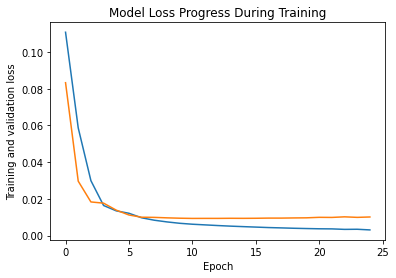

In [254]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and validation loss')

In [255]:
y_predict = model.predict(x_test)

In [256]:
y_predict

array([[0.3589156 ],
       [0.86453056],
       [0.53566796],
       [0.6558201 ],
       [0.6520835 ],
       [0.4312909 ],
       [0.6026501 ],
       [0.6380962 ],
       [0.46806878],
       [0.8122911 ],
       [0.58591944],
       [0.24277566],
       [0.7595334 ],
       [0.60430294],
       [0.6219628 ],
       [0.5190973 ],
       [0.15811226],
       [0.49718606],
       [0.60262614],
       [0.42667395],
       [0.7417995 ],
       [0.23251441],
       [0.44754466],
       [0.41894567],
       [0.8243161 ],
       [0.40002623],
       [0.4428543 ],
       [0.8268465 ],
       [0.15764277],
       [0.6379822 ],
       [0.10310079],
       [0.7821164 ],
       [0.49303824],
       [0.18814433],
       [0.66950816],
       [0.5261059 ],
       [0.7435218 ],
       [0.791127  ],
       [0.39646903],
       [0.8098055 ],
       [0.83367884],
       [0.34072393],
       [0.5036835 ],
       [0.5125986 ],
       [0.7302624 ],
       [0.6830031 ],
       [0.44286484],
       [0.500

Text(0, 0.5, 'True values')

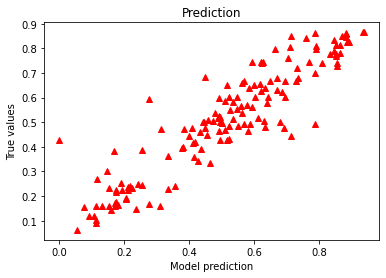

In [257]:
plt.plot(y_test, y_predict, "^", color="r")
plt.title('Prediction')
plt.xlabel('Model prediction')
plt.ylabel('True values')


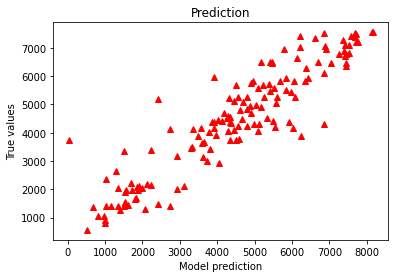

In [258]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

plt.plot(y_test_orig, y_predict_orig, "^", color="r")
plt.title('Prediction')
plt.xlabel('Model prediction')
plt.ylabel('True values');

In [259]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [260]:
k = x_test.shape[1]
k

33

In [261]:
n = len(x_test)
n

147

In [262]:
# Valor 0 = previsões perfeitas
mae = mean_absolute_error(y_test_orig, y_predict_orig)
mae

583.2382895541028

In [263]:
# Penaliza os outliers, quanto maior os outliers, maior será o erro
mse = mean_squared_error(y_test_orig, y_predict_orig)
mse

668054.414985105

In [264]:
# Prevê estimativa de quanto os resíduos estão dispersos
rmse = sqrt(mse)
rmse

817.3459579548338

In [265]:
# Indica a qualidade do modelo (melhor quanto mais próximo de 1)
# Bons modelos chegam acima de 0.95
r2 = r2_score(y_test_orig, y_predict_orig)
r2

0.8424191952923921

In [266]:
# Caso o r2 ajustado seja menor que 1 (menor que o r2)
# é porque provavelmente há variáveis insignificantes
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - k - 1)
r2_ajustado

0.796400022236188

In [267]:
print(
    'MAE        : ', mae, 
    '\nMSE        : ', mse, 
    '\nRMSE       : ', rmse, 
    '\nR2         : ', r2, 
    '\nR2 Ajustado: ', r2_ajustado
)

MAE        :  583.2382895541028 
MSE        :  668054.414985105 
RMSE       :  817.3459579548338 
R2         :  0.8424191952923921 
R2 Ajustado:  0.796400022236188
